# **DIPLOMATURA UNIVERSITARIA EN CIENCIA DE DATOS**

# Módulo 5: Aprendizaje No Supervisado

## Técnicas de muestreo: Método de Inversión. Muestreo por rechazo. Muestreo de importancia. Importance-sampling-resampling.

## **Docentes:** Lic. Luis Duarte - Dra. Griselda Bobeda  - Dra. Magdalena Lucini

### Noviembre 2024, FaCENA - UNNE

### Contacto:  
* luis.duarte@comunidad.unne.edu.ar;
* griseldabobeda@gmail.com;
* mariamlucini@comunidad.unne.edu.ar

**Objetivos:**

*   Explorar diferentes técnicas de muestreo.


## **1. Método de Inversión.**

### **1.1 Considere la variable aleatoria $X\sim \mathcal{E}(1)$. Utilizando el método de inversión, obtenga una muestra de un milllón de observaciones y estime la media y el desvío de dicha variable.**

Recordemos que:
* $f_X(x)=e^{-x}, \forall x\in [0,+\infty)$
* $F_X(x)=1-e^{-x}, \forall x\in [0,+\infty)$

Luego, $Y=F_x^{-1}\sim \mathcal{U}(0,1)$, por lo que:

$$F_x^{-1}(y)=-ln(1-y)$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dens_exp(x):
  return np.exp(-x)
xvals = np.linspace(0, 10, 100)
plt.plot(xvals, dens_exp(xvals), label='$\mathcal{E}(1)$')
plt.legend(loc='upper right', shadow=True)
plt.xlim(0, 10)
plt.show()

In [ ]:
y = np.random.uniform(0, 1, 10**6)
x = -np.log((1 - y))
plt.hist(x, density=True, bins=100, label='bins')
plt.plot(xvals, dens_exp(xvals), label='$\mathcal{E}(1)$')
plt.xlim(0, 10)
plt.legend(loc='upper right', shadow=True)
plt.show()

In [ ]:
Media=np.mean(x)
Desvio=np.std(x)
print("La media es: ", Media)
print("El desvío estándar es: ", Desvio)

La media es:  1.001042648712789
El desvío estándar es:  1.0004297024956785


### **1.2 Considere ahora la variable aleatoria $X\sim \text{Gumbel}(0,1)$. Utilizando el método de inversión, obtenga una muestra de un milllón de observaciones y estime la media y el desvío de dicha variable.**

NOTA:
* $f_X(x)=e^{-(x+e^{-x})}$.
* $F_X(x)=e^{-e^{-x}}$.

In [ ]:
#########
# TO DO #
#########

## **2. Muestreo por Aceptación - Rechazo.**

### **2.1 ¿Cómo harían, utilizando muestreo, para estimar el área bajo la curva $y=x^2$, entre $x=0$ y $x=1$?**

In [ ]:
# Definimos la función y = x^2
def f(x):
    return x**2

x = np.linspace(0, 1, 1000)
y = f(x)

plt.figure(figsize=(8, 6))

plt.plot(x, y, label=r'$y = x^2$', color='blue')
plt.fill_between(x, y, color='lightblue', alpha=0.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
#Generamos dos vectores de números aleatorios uniformemente distribuidos en [0,1].
import numpy as np
import matplotlib.pyplot as plt
n=10**6
x = np.random.rand(n)
y = np.random.rand(n)

# Aceptación - Rechazo
aceptados = y <= f(x)

# Estimación del área
area_estimada = np.sum(aceptados) / n

# Imprimir el resultado
print(f"Área estimada: {area_estimada}")

# Graficar los puntos aceptados y rechazados
plt.scatter(x[aceptados], y[aceptados], color='green', s=1, label="Aceptados")
plt.scatter(x[~aceptados], y[~aceptados], color='blue', s=1, label="Rechazados")
plt.plot(np.linspace(0, 1, 1000), f(np.linspace(0, 1, 1000)), color="black", label="f(x) = x^2")
plt.legend()
plt.title("Método de aceptación-rechazo")
plt.show()


### **2.2 Se requiere obtener una muestra de tamaño 1000 de la distribución semicircular en $\left[0,1\right]$, y a partir de ella, estimar la media y la varianza de esta distribución.**

In [ ]:
# Tamaño de la muestra
n = 1000

# Función objetivo (proporcional a la densidad)
def f(x):
    return np.sqrt(x*(1-x))

# Constante de normalización
M = 0.5  # Máximo de f(x) en [0,1]

# Generamos las muestras por aceptación-rechazo
muestras = []
while len(muestras) < n:
    x = np.random.uniform(0, 1)
    u = np.random.uniform(0, M)

    if u <= f(x):
        muestras.append(x)

muestras = np.array(muestras)

print(muestras[:10])

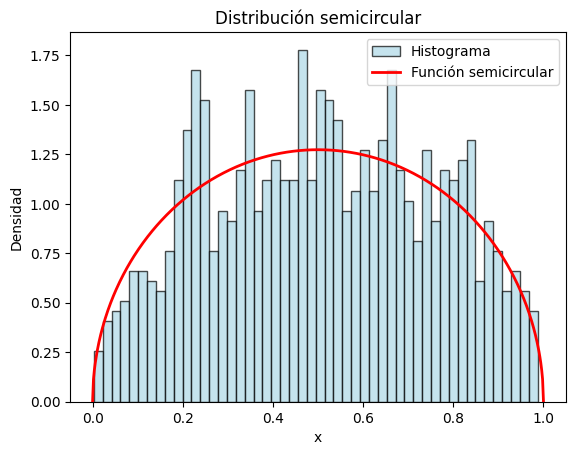

In [ ]:
# Graficar la distribución
plt.hist(muestras, bins=50, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Histograma')
x = np.linspace(0, 1, 500)
plt.plot(x, 8/np.pi*f(x), 'r-', lw=2, label='Función semicircular')
plt.title('Distribución semicircular')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Estimemos la media y la varianza de esta distribución:

In [ ]:
Media=np.mean(muestras)
Varianza=np.var(muestras)
print("La media es: ", Media)
print("La varianza es: ", Varianza)

### **2.3 Sea $P(x)=3e^{-\frac{x^2}{2}} + e^{-\frac{(x-4)^2}{2}}$ la distribución de la cual queremos muestrear para estimar: $E_P\left[X\right]$ y $E_P\left[\sin\right]$ . Tengamos en cuenta que esta es una distribución no normalizada con una constante de normalización $Z$ que podemos calcular, pero dejémosla tal como está. ($Z\approx 10.0261955464$). Con una muestra de tamaño un millón, estime las esperanzas solicitadas.**





In [ ]:
# Función objetivo
def P(x):
    return 3 * np.exp(-x*x/2) + np.exp(-(x - 4)**2/2)


In [ ]:
x_vals = np.linspace(-10, 10, 1000)
y_vals = P(x_vals)
plt.figure(1)
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

Una forma alternativa de mayorar la función de la cual se quieren extraer muestras es utilizando distribuciones conocidas, por ejemplo, distribución normal. En este caso elegimos una distibución proporcional a $\mathcal{N}\left(1,4^2\right)$.

In [ ]:
def Q(x):
  return np.exp(-(x-1)**2/32)

In [ ]:
plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.plot(x_vals, Q(x_vals), 'g', label='Q(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

Como vemos, la función propuesta para mayorar no es suficiente, por lo que podemos multilicarla por un factor que permita que la función propuesta efectivamente mayore a $P$.

In [ ]:
def cQ(x):
  return 4*np.exp(-(x-1)**2/32)

plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.plot(x_vals, cQ(x_vals), 'g', label='4Q(x)')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [ ]:
# Tamaño de la muestra
n = 10**6

# Generamos las muestras por aceptación-rechazo
muestras = []
while len(muestras) < n:
    x = np.random.normal(1,4)
    P_x=P(x)
    u = np.random.uniform(0, cQ(x))

    if u <= P_x:
        muestras.append(x)

muestras = np.array(muestras)

In [ ]:
Z=10.0261955464
plt.hist(muestras, bins=50, histtype='bar', facecolor='g', alpha=0.75, density=True, label='bins')
plt.plot(x_vals, y_vals/Z, 'r', label='P(x)')
plt.title('Muetreo por Aceptación - Rechazo')
plt.legend(loc='upper right', shadow=True)
plt.show()

Estimemos las esperanzas solicitadas:

In [ ]:
def fx(x):
  return x

def gx(x):
  return np.sin(x)

E_fx = np.mean(fx(muestras))*Z
E_gx = np.mean(gx(muestras))*Z

print(f'E[f] = {E_fx:.5f}')
print(f'E[g)] = {E_gx:.5f}')


E[f] = 10.05160
E[g)] = -1.14629


Sabiendo que los valores reales son $E_P\left[X\right]\approx 10.02686647165$ y $E_P\left[\sin\right]\approx -1.15088010640$, podemos calcular los errores de estimación:

In [ ]:
true_expected_fx = 10.02686647165
true_expected_gx = -1.15088010640
print('E[f(x)] = %.5f, Error = %.5f' % (E_fx, abs(E_fx - true_expected_fx)))
print('E[g(x)] = %.5f, Error = %.5f' % (E_gx, abs(E_gx - true_expected_gx)))

E[f(x)] = 10.05160, Error = 0.02474
E[g(x)] = -1.14629, Error = 0.00459


### **2.4 Repetir el ítem anterior, utilizando como función mayorante la densidad de una distribución uniforme.**

In [ ]:
#########
# TO DO #
#########

### **2.5 Se requiere ahora obtener una muestra de tamaño 1000 de la distribución triangular:**

$$f(\theta)\propto \begin{cases}
\theta & 0< \theta \leq 1/2\\
1-\theta & 1/2<\theta < 1
\end{cases}$$

y estimar su esperanza y varianza.

In [ ]:
#########
# TO DO #
#########

## **3. Muestreo por importancia.**

El **muestreo por importancia** es una técnica estadística utilizada para estimar valores esperados de una función $f(x)$ bajo una distribución de probabilidad $p(x)$ cuando no es posible muestrear directamente de $p(x)$, pero sí se puede muestrear de otra distribución llamada **distribución propuesta** $q(x)$.

La idea básica es *ajustar* los valores muestreados de la distribución propuesta, ponderándolos con un **peso de importancia** para corregir la diferencia entre la distribución propuesta y la distribución objetivo.

Matemáticamente, el valor esperado de una función $f(x)$ con respecto a $p(x)$ se puede escribir como:

$$\mathbb{E}_{p}[f] = \int f(x) p(x) \, dx$$

Sin embargo, si no podemos muestrear directamente de $p(x)$, podemos muestrear de $q(x)$ (la distribución propuesta) y corregir utilizando un peso que depende de la relación entre $p(x)$ y $q(x)$.

La fórmula usando muestreo por importancia es:

$$\mathbb{E}_{p}[f] = \int f(x) \frac{p(x)}{q(x)} q(x) \, dx$$

Aquí, $\frac{p(x)}{q(x)}$ es el **peso de importancia** que ajusta los valores muestreados de $q(x)$ para estimar correctamente la expectativa bajo $p(x)$.


### **3.1 Retomemos lo hecho en 2.3, utilizando como distribución propuesta $q(x)$ la distribución uniforme en $[-4,8].$**

Tomemos, entonces, la función $q(x)=\cfrac{1}{12} \forall x\in [-4, 8]$


In [ ]:
a=-4
b=8
dens_unif=1/(b-a)
x_vals = np.linspace(-10, 10, 1000)
y_vals = P(x_vals)

plt.plot(x_vals, y_vals, 'r', label='P(x)')
plt.plot(x_vals, fx(x_vals), 'b', label='x')
plt.plot([-10, a, a, b, b, 10], [0, 0, dens_unif, dens_unif, 0, 0], 'g', label='q(x)')
plt.plot(x_vals, np.sin(x_vals), label='sin(x)')
plt.xlim(-10, 10)
plt.ylim(-1, 3.5)
plt.legend(loc='upper right', shadow=True)
plt.show()

In [ ]:
E_fx = 0.
E_gx = 0.
n= 10**6
den = 0.
for i in range(n):
    x = np.random.uniform(a, b)
    importance = P(x) / dens_unif
    den += importance
    E_fx += importance * fx(x)
    E_gx += importance * gx(x)

E_fx /= den
E_gx /= den
E_fx *= Z
E_gx *= Z
print('E[f(x)] = %.5f, Error = %.5f' % (E_fx, abs(E_fx- true_expected_fx)))
print('E[g(x)] = %.5f, Error = %.5f' % (E_gx, abs(E_gx - true_expected_gx)))

E[f(x)] = 9.99508, Error = 0.03178
E[g(x)] = -1.15559, Error = 0.00471


### **3.2 Probar con otros valores de parámetros con el objetivo de mejorar las estimaciones.**

In [ ]:
#########
# TO DO #
#########

### **3.3 Proponer otras distribuciones para $q(x)$ que tengan lógica en este problema.**

In [ ]:
#########
# TO DO #
#########

## **4. Muestreo y Remuestreo.**

El **Muestreo por Importancia** y el **Remuestreo** son técnicas clave en simulaciones Monte Carlo, donde se busca mejorar la eficiencia de las estimaciones probabilísticas, especialmente en situaciones donde hay eventos raros o las distribuciones son difíciles de muestrear directamente.


### **4.1 Supongamos que queremos calcular la esperanza $E\left[f\right]$, donde $X\sim \mathcal{N}(0,1)$, pero la función $f(x)$ toma valores muy altos en ciertas regiones, haciendo difícil estimar la integral usando muestreo directo. Tomemos, por ejemplo: $f(x)=e^{-x^2/2}$.**


In [ ]:
def f(x):
    return np.exp(-x**2 / 2)

* **Función Objetivo:** Normal estandar.
* **Distribución Propuesta:** Normal con media 2 y desvío 1.

In [ ]:
def dist_prop(n):
    return np.random.normal(2, 1, size=n)

* **Calculemos el peso (importancia) que no es más que la razón de densidades entre la distribución objetivo y la propuesta.**

In [ ]:
def peso(x):
    # Normal estándar: N(0, 1)
    dens_est = (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
    # Propuesta: N(2, 1)
    dens_prop= (1 / np.sqrt(2 * np.pi)) * np.exp(-(x - 2)**2 / 2)
    return dens_est / dens_prop

* **Remuestreo (opcional, dependiendo de si algunos pesos son demasiado grandes)**

Ocasionalmente, los pesos en muestreo por importancia pueden volverse muy heterogeneos, lo que podría inducir un sesgo en la estimación. El remuestreo puede ayudar a suavizar estas oscilaciones.

In [ ]:
def remuestreo(pesos, muestra):
    indices_remuestreo = np.random.choice(np.arange(len(muestra)), size=len(muestra), p=pesos/np.sum(pesos))
    return muestra[indices_remuestreo]


* **Obtengamos ahora una muestra por importancia y la estimación:**

In [ ]:
n=10**4
muestra=dist_prop(n)
pesos=peso(muestra)
estim = np.mean(f(muestra) * pesos)

* **Remuestreo y estimación:**

In [ ]:
remuestra = remuestreo(pesos, muestra)
estim_rem = np.mean(f(remuestra))

In [ ]:
print("Estimación con Muestreo por Importancia:", estim)
print("Estimación con Remuestreo:", estim_rem)

* **Visualización de las muestras antes y después del remuestreo.**

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(muestra, bins=50, alpha=0.7, label="Muestras originales", density=True)
plt.title("Muestras de la distribución propuesta")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(remuestra, bins=50, alpha=0.7, label="Muestras re-muestreadas", density=True)
plt.title("Muestras después de Remuestreo")
plt.legend()

plt.show()